In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

Funcion del punto 5

In [3]:
def RMS(data: np.array) -> float:
    N = len(data)
    data = data**2
    sum = np.sum(data)
    MS = sum/N
    return MS**(1/2) 

In [4]:
data = sp.io.loadmat('signals.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

In [6]:
Fs = data['Fs'].flatten()[0]
Ts = 1/Fs
N = len(data['ECG_asRecording'].flatten())

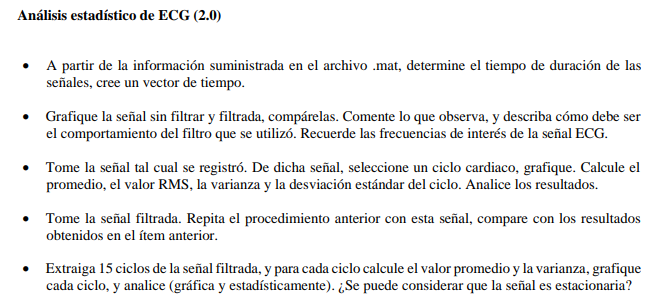

Parte 1

In [7]:
tiempoTotal = N*Ts # 30s
print(f'El tiempo es {tiempoTotal}s')
t = np.arange(0, tiempoTotal, Ts)
print(t)

El tiempo es 30.0s
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


Parte 2

La filtrada y la sin filtrar tienen la misma longitud


Text(0.5, 1.0, 'Comparación')

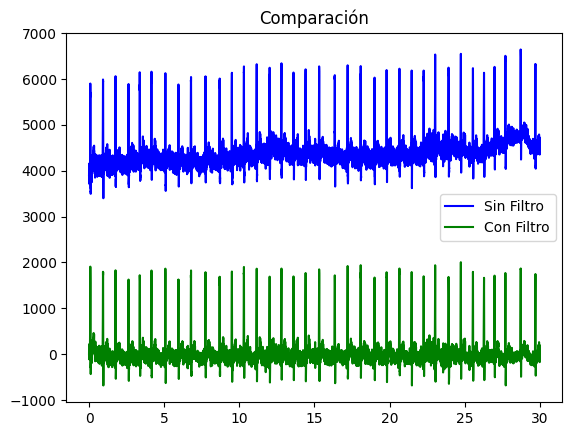

In [8]:
sF = data['ECG_asRecording'].flatten()
cF = data['ECG_filtered'].flatten()
if (len(cF) == len(sF)):
    print("La filtrada y la sin filtrar tienen la misma longitud")
plt.figure()
plt.plot(t,sF, color = "blue")
plt.plot(t,cF, color = 'green')
plt.legend(['Sin Filtro', 'Con Filtro'])
plt.title('Comparación')

Lo miramos recortado entre 0 y 1000

Text(0.5, 1.0, 'Comparación de 0 a 1000 datos')

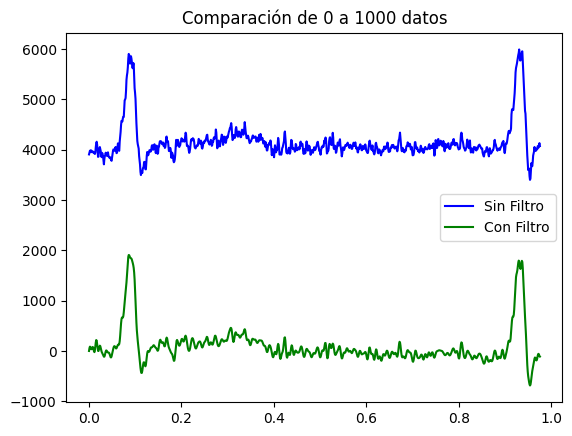

In [9]:
t2 = t[0:1000]
sF2 = data['ECG_asRecording'].flatten()[0:1000]
cF2 = data['ECG_filtered'].flatten()[0:1000]
plt.figure()
plt.plot(t2,sF2, color = "blue")
plt.plot(t2,cF2, color = 'green')
plt.legend(['Sin Filtro', 'Con Filtro'])
plt.title('Comparación de 0 a 1000 datos')

Existe un movimiento oscilatorio de baja frecuencia que deberia de ser eliminado por el filtro (Un filtro pasaaltas) y además existe un offset y una señal a alta frecuencia que se nota en la comparación de 0 a 1s donde hay un ruido pequeño en toda la señal sin filtrar que es de alta frecuencia y se eliminaria con otro filtro (Un filtro pasabaja).
Debido a que es una señal biologica debe tener un filtro notch a 60hz.

### Parte 3

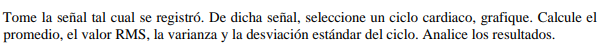

Text(0.5, 1.0, 'Representación del fragmento elegido')

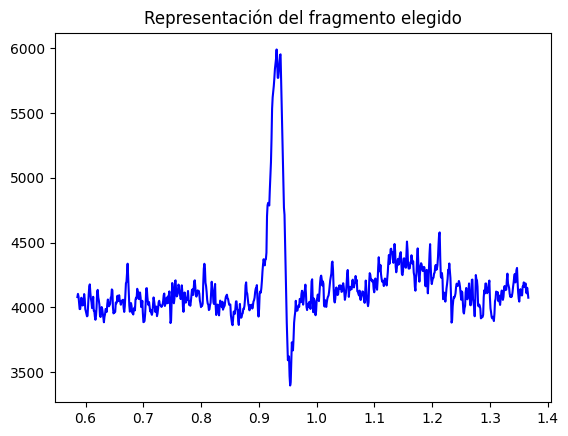

In [10]:
t3 = t[600:1400]
sF3 = data['ECG_asRecording'].flatten()[600:1400]
plt.plot(t3,sF3, color = "blue")
plt.title('Representación del fragmento elegido')

In [11]:
rms = RMS(sF3)
mean = np.mean(sF3)
std = np.std(sF3)
var = np.var(sF3)
print(f'''
      La raiz cuadratica media (RMS) es: {rms}
      El valor promedio es: {mean}
      La desviación estandar es: {std}
      La varianza: {var}''')


      La raiz cuadratica media (RMS) es: 4170.619751211114
      El valor promedio es: 4159.31981842041
      La desviación estandar es: 306.80247275316873
      La varianza: 94127.75728745884


El valor promedio y el RMS son altos porque hay un offset de la señal, que no es eliminado hasta el filtrado.

### Parte 4
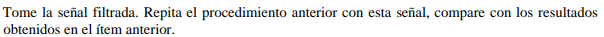

Text(0.5, 1.0, 'Representación del fragmento elegido')

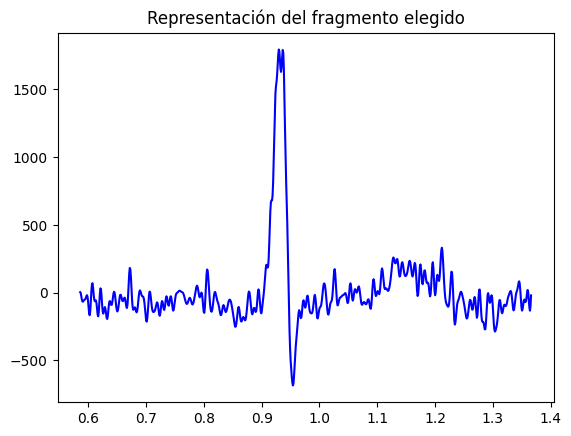

In [13]:
t4 = t[600:1400]
sF4 = data['ECG_filtered'].flatten()[600:1400]
plt.plot(t4,sF4, color = "blue")
plt.title('Representación del fragmento elegido')

In [14]:
rms = RMS(sF4)
mean = np.mean(sF4)
std = np.std(sF4)
var = np.var(sF4)
print(f'''
      La raiz cuadratica media (RMS) es: {rms}
      El valor promedio es: {mean}
      La desviación estandar es: {std}
      La varianza: {var}''')


      La raiz cuadratica media (RMS) es: 300.59902287957834
      El valor promedio es: 8.146604122810016
      La desviación estandar es: 300.4886110943699
      La varianza: 90293.40539742347


### Parte 5
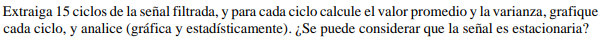